In [172]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random


# read csv
file = "data_base_clean.csv"
df = pd.read_csv(file, encoding="ISO-8859-1")
df.head(2)

,id,name,host_id,host_name,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,bed_type,amenities,review_scores_rating
0,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,Private room,1957,1,10,11/05/2018,0.58,8,0,Real Bed,"{Wifi,""Paid parking off premises"",Breakfast,Wa...",87.0
1,44616,CONDESA HAUS BOUTIQUE B&B,196253,Condesa Haus Bed & BReakfast CDMX,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,Private room,1906,1,39,02/05/2019,0.43,10,330,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Free parking on ...",89.0


In [173]:
#df.count()

In [174]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_cleansed',
       'neighbourhood', 'zipcode', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'bed_type', 'amenities', 'review_scores_rating'],
      dtype='object')

In [175]:
# Remove properties with no price per night
airbnb_positive_df = df.loc[df["price"]>0,["id","neighbourhood_cleansed","neighbourhood",
                                        "zipcode","latitude","longitude","price"]]
airbnb_positive_df.head()

,id,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,price
0,22787,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,1957
1,44616,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,1906
2,58955,Cuauhtemoc,Roma Norte,6700,19.42292,-99.15775,1620
3,61792,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,953
4,67703,Cuauhtemoc,Hipodromo,6100,19.41375,-99.17028,1810


In [176]:
# Remove properties with price per night higher than 37,000
airbnb_positive1_df = airbnb_positive_df.loc[airbnb_positive_df["price"]<37000,["id","neighbourhood_cleansed",
                                        "neighbourhood","zipcode","latitude","longitude","price"]]
airbnb_positive1_df.head()

,id,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,price
0,22787,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,1957
1,44616,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,1906
2,58955,Cuauhtemoc,Roma Norte,6700,19.42292,-99.15775,1620
3,61792,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,953
4,67703,Cuauhtemoc,Hipodromo,6100,19.41375,-99.17028,1810


In [177]:
#airbnb_positive1_df.count()

In [178]:
#Check data types
#airbnb_positive1_df.dtypes

In [179]:
#Review prices
#price = df["price"].unique()
#len(price)

In [180]:
#Group County and Neighbourhood
county_neig = airbnb_positive1_df.groupby(["neighbourhood_cleansed","neighbourhood"])

max_price = county_neig['price'].max()
min_price = county_neig['price'].min()
mean_price = county_neig['price'].mean()

#Create a summary data frame to hold the results
county_neig_df = pd.DataFrame({"Maximum Price":max_price,
                                 "Minimum Price":min_price,
                                 "Average Price":mean_price})
county_neig_df.head()

Maximum Price  Minimum Price  \
neighbourhood_cleansed neighbourhood                                           
Alvaro Obregon         Campestre/Guadalupe Inn           6251            190   
                       Coyoacan                          1334           1334   
                       Florida/Axotla                    2280            248   
                       Insurgentes                       1296            686   
                       Nonoalco                          1277            191   

                                                Average Price  
neighbourhood_cleansed neighbourhood                           
Alvaro Obregon         Campestre/Guadalupe Inn     955.611111  
                       Coyoacan                   1334.000000  
                       Florida/Axotla              787.392157  
                       Insurgentes                1010.000000  
                       Nonoalco                    653.272727

# Price summary

In [181]:
#Group by County (descending price)
county = airbnb_positive1_df.groupby(["neighbourhood_cleansed"])

max_price = county['price'].max()
min_price = county['price'].min()
mean_price = county['price'].mean()
county_properties = county['neighbourhood_cleansed'].count()

#Create a summary data frame to hold the results
county_df = pd.DataFrame({"Maximum Price":max_price,
                          "Minimum Price":min_price,
                          "Average Price":mean_price,
                          "Number of properties":county_properties})

descending_county_df = county_df.sort_values("Maximum Price", ascending = True)

descending_county_df["Maximum Price"] = descending_county_df["Maximum Price"].map("${:,.2f}".format)
descending_county_df["Minimum Price"] = descending_county_df["Minimum Price"].map("${:,.2f}".format)
descending_county_df["Average Price"] = descending_county_df["Average Price"].map("${:,.2f}".format)
descending_county_df

,Maximum Price,Minimum Price,Average Price,Number of properties
neighbourhood_cleansed,,,,
Iztacalco,"$1,296.00",$210.00,$444.31,32
Azcapotzalco,"$1,748.00",$190.00,$651.89,27
Gustavo A. Madero,"$1,824.00",$209.00,$609.58,12
Iztapalapa,"$2,001.00",$229.00,$700.13,15
Venustiano Carranza,"$4,193.00",$191.00,$634.88,24
Alvaro Obregon,"$6,251.00",$172.00,$870.70,264
Benito Juarez,"$23,974.00",$172.00,$706.93,2009
Coyoacan,"$28,586.00",$172.00,$892.86,748
Miguel Hidalgo,"$34,303.00",$191.00,"$1,466.39",1881


In [182]:
#Group by County
county1 = airbnb_positive1_df.groupby(["neighbourhood_cleansed"])

max_price = county1['price'].max()
min_price = county1['price'].min()
mean_price = county1['price'].mean()
county_properties = county1['neighbourhood_cleansed'].count()

#Create a summary data frame to hold the results
county1_df = pd.DataFrame({"Maximum Price":max_price,
                          "Minimum Price":min_price,
                          "Average Price":mean_price,
                          "Number of properties":county_properties})

county1_df.head()

,Maximum Price,Minimum Price,Average Price,Number of properties
neighbourhood_cleansed,,,,
Alvaro Obregon,6251,172,870.700758,264
Azcapotzalco,1748,190,651.888889,27
Benito Juarez,23974,172,706.930314,2009
Coyoacan,28586,172,892.862299,748
Cuauhtemoc,36484,172,1188.152450,5674


In [183]:
# index to column
county1_df['neighbourhood_cleansed'] = county1_df.index
county1_df.head()

,Maximum Price,Minimum Price,Average Price,Number of properties,neighbourhood_cleansed
neighbourhood_cleansed,,,,,
Alvaro Obregon,6251,172,870.700758,264,Alvaro Obregon
Azcapotzalco,1748,190,651.888889,27,Azcapotzalco
Benito Juarez,23974,172,706.930314,2009,Benito Juarez
Coyoacan,28586,172,892.862299,748,Coyoacan
Cuauhtemoc,36484,172,1188.152450,5674,Cuauhtemoc


In [184]:
# neighbourhood
result_county = county1_df["neighbourhood_cleansed"].tolist()
result_county

['Alvaro Obregon',
 'Azcapotzalco',
 'Benito Juarez',
 'Coyoacan',
 'Cuauhtemoc',
 'Gustavo A. Madero',
 'Iztacalco',
 'Iztapalapa',
 'Miguel Hidalgo',
 'Venustiano Carranza']

In [185]:
# maximum price to list
max_price = county1_df["Maximum Price"].tolist()
max_price

[6251, 1748, 23974, 28586, 36484, 1824, 1296, 2001, 34303, 4193]

In [186]:
# minimum price to list
min_price = county1_df["Minimum Price"].tolist()
min_price

[172, 190, 172, 172, 172, 209, 210, 229, 191, 191]

In [187]:
# average price to list
avg_price = county1_df["Average Price"].tolist()
avg_price

[870.7007575757576,
 651.8888888888889,
 706.9303135888501,
 892.8622994652407,
 1188.1524497708847,
 609.5833333333334,
 444.3125,
 700.1333333333333,
 1466.3923444976076,
 634.875]

## Bar chart - Average Price

In [188]:
final_county = result_county
x_axis = np.arange(len(final_county))

<function matplotlib.pyplot.show(*args, **kw)>

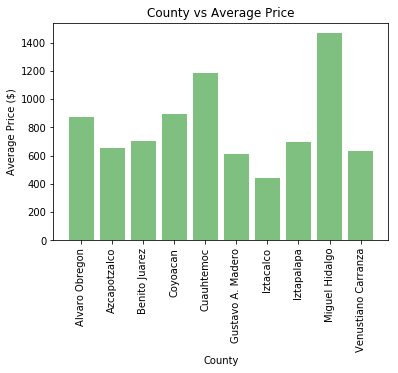

In [191]:
plt.bar(x_axis, avg_price, color='g', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, result_county, rotation='vertical')
plt.title("County vs Average Price")
plt.xlabel("County")
plt.ylabel("Average Price ($)")
plt.show

# Bar chart - Max Price

<function matplotlib.pyplot.show(*args, **kw)>

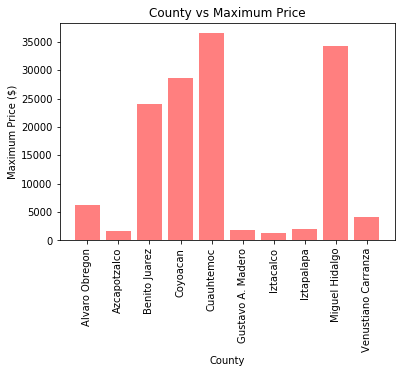

In [192]:
plt.bar(x_axis, max_price, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, result_county, rotation='vertical')
plt.title("County vs Maximum Price")
plt.xlabel("County")
plt.ylabel("Maximum Price ($)")
plt.show

# Bar chart - Min Price

<function matplotlib.pyplot.show(*args, **kw)>

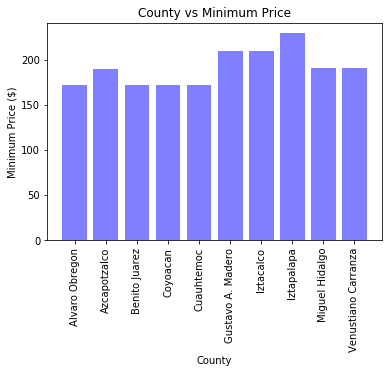

In [193]:
plt.bar(x_axis, min_price, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, result_county, rotation='vertical')
plt.title("County vs Minimum Price")
plt.xlabel("County")
plt.ylabel("Minimum Price ($)")
plt.show

# Pie chart

In [194]:
county = result_county
average = avg_price
colors = ["beige", "green", "lightblue", "orange", "gray",
          "purple", "pink", "yellowgreen", "lightskyblue", "lightcoral"]
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.15, 0.05)

([<matplotlib.patches.Wedge at 0x1a1cb5fcf8>,
 [Text(-1.0749990532350366, 0.408505857416727, 'Alvaro Obregon'),
  Text(-1.1216194186862365, -0.2539091956309368, 'Azcapotzalco'),
  Text(-0.8450425681826594, -0.7800019602278288, 'Benito Juarez'),
  Text(-0.23964094190978552, -1.1247542927060075, 'Coyoacan'),
  Text(0.6404790240957676, -0.9551369638399161, 'Cuauhtemoc'),
  Text(1.102482613066299, -0.32715758876496404, 'Gustavo A. Madero'),
  Text(1.142139119156989, 0.13423200993540177, 'Iztacalco'),
  Text(0.9759975680164217, 0.6082176807903816, 'Iztapalapa'),
  Text(0.2237812219560409, 1.2298056613546147, 'Miguel Hidalgo'),
  Text(-0.6760409638950404, 0.930305656833207, 'Venustiano Carranza')],
 [Text(-0.607608160524151, 0.2308946150616283, '10.7%'),
  Text(-0.6339588018661335, -0.1435138931827034, '8.0%'),
  Text(-0.47763275592932924, -0.44087067317225104, '8.7%'),
  Text(-0.1354492280359657, -0.6357306871816564, '10.9%'),
  Text(0.36200988318456434, -0.5398600230399525, '14.6%'),
  Tex

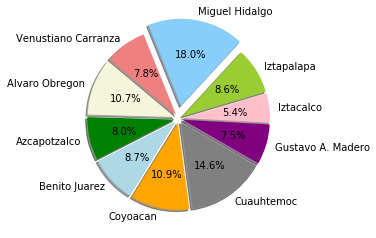

In [195]:
plt.pie(average, explode=explode, labels=county, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

# Scatter plot - Max Price

<function matplotlib.pyplot.show(*args, **kw)>

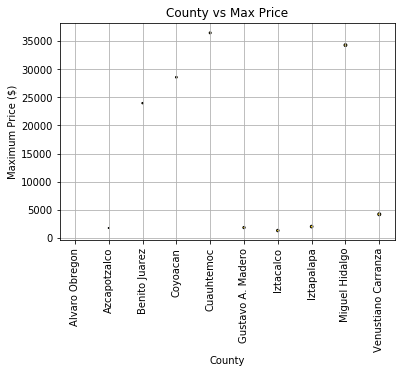

In [196]:
plt.scatter(result_county, max_price, marker="o", facecolors="gold", edgecolors="black",
            s=x_axis, alpha=1)
plt.title("County vs Max Price")
plt.xlabel("County")
plt.ylabel("Maximum Price ($)")
plt.xticks(tick_locations, result_county, rotation='vertical')
plt.grid()
plt.show

# Scatter plot - all counties / all prices

In [197]:
airbnb_positive1_df.head()

,id,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,price
0,22787,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,1957
1,44616,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,1906
2,58955,Cuauhtemoc,Roma Norte,6700,19.42292,-99.15775,1620
3,61792,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,953
4,67703,Cuauhtemoc,Hipodromo,6100,19.41375,-99.17028,1810


In [198]:
# all county to list
all_county = airbnb_positive1_df["neighbourhood_cleansed"].tolist()
#all_county

In [199]:
# all price to list
all_price = airbnb_positive1_df["price"].tolist()
#all_price

<function matplotlib.pyplot.show(*args, **kw)>

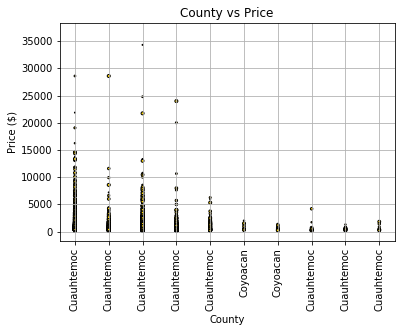

In [200]:
plt.scatter(all_county, all_price, marker="o", facecolors="gold", edgecolors="black",
            s=x_axis, alpha=1)
plt.title("County vs Price")
plt.xlabel("County")
plt.ylabel("Price ($)")
plt.xticks(tick_locations, all_county, rotation='vertical')
plt.grid()
plt.show

# p-value

In [201]:
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [202]:
# using the clean dataframe >0 and <37,000
airbnb_positive1_df = airbnb_positive_df.loc[airbnb_positive_df["price"]<37000,["id","neighbourhood_cleansed",
                                        "neighbourhood","zipcode","latitude","longitude","price"]]
airbnb_positive1_df.head()

,id,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,price
0,22787,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,1957
1,44616,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,1906
2,58955,Cuauhtemoc,Roma Norte,6700,19.42292,-99.15775,1620
3,61792,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,953
4,67703,Cuauhtemoc,Hipodromo,6100,19.41375,-99.17028,1810


In [203]:
# inserting a new column index1 for p-value purpose
# assigning values to each neighbourhood_cleansed
# Alvaro Obregon=1, Azcapotzalco=2, Benito Juarez=3, Coyoacan=4, Cuauhtemoc=5
# Gustavo A. Madero=6, Iztacalco=7, Iztapalapa=8, Miguel Hidalgo=9, Venustiano Carranza=10
airbnb_positive1_df.loc[airbnb_positive1_df['neighbourhood_cleansed'] == 'Alvaro Obregon', 'index1'] = 1
airbnb_positive1_df.loc[airbnb_positive1_df['neighbourhood_cleansed'] == 'Azcapotzalco', 'index1'] = 2
airbnb_positive1_df.loc[airbnb_positive1_df['neighbourhood_cleansed'] == 'Benito Juarez', 'index1'] = 3
airbnb_positive1_df.loc[airbnb_positive1_df['neighbourhood_cleansed'] == 'Coyoacan', 'index1'] = 4
airbnb_positive1_df.loc[airbnb_positive1_df['neighbourhood_cleansed'] == 'Cuauhtemoc', 'index1'] = 5
airbnb_positive1_df.loc[airbnb_positive1_df['neighbourhood_cleansed'] == 'Gustavo A. Madero', 'index1'] = 6
airbnb_positive1_df.loc[airbnb_positive1_df['neighbourhood_cleansed'] == 'Iztacalco', 'index1'] = 7
airbnb_positive1_df.loc[airbnb_positive1_df['neighbourhood_cleansed'] == 'Iztapalapa', 'index1'] = 8
airbnb_positive1_df.loc[airbnb_positive1_df['neighbourhood_cleansed'] == 'Miguel Hidalgo', 'index1'] = 9
airbnb_positive1_df.loc[airbnb_positive1_df['neighbourhood_cleansed'] == 'Venustiano Carranza', 'index1'] = 10
airbnb_positive1_df.head()

,id,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,price,index1
0,22787,Cuauhtemoc,San Rafael,6470,19.44076,-99.16324,1957,5.0
1,44616,Cuauhtemoc,Condesa,6140,19.41006,-99.17645,1906,5.0
2,58955,Cuauhtemoc,Roma Norte,6700,19.42292,-99.15775,1620,5.0
3,61792,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,953,5.0
4,67703,Cuauhtemoc,Hipodromo,6100,19.41375,-99.17028,1810,5.0


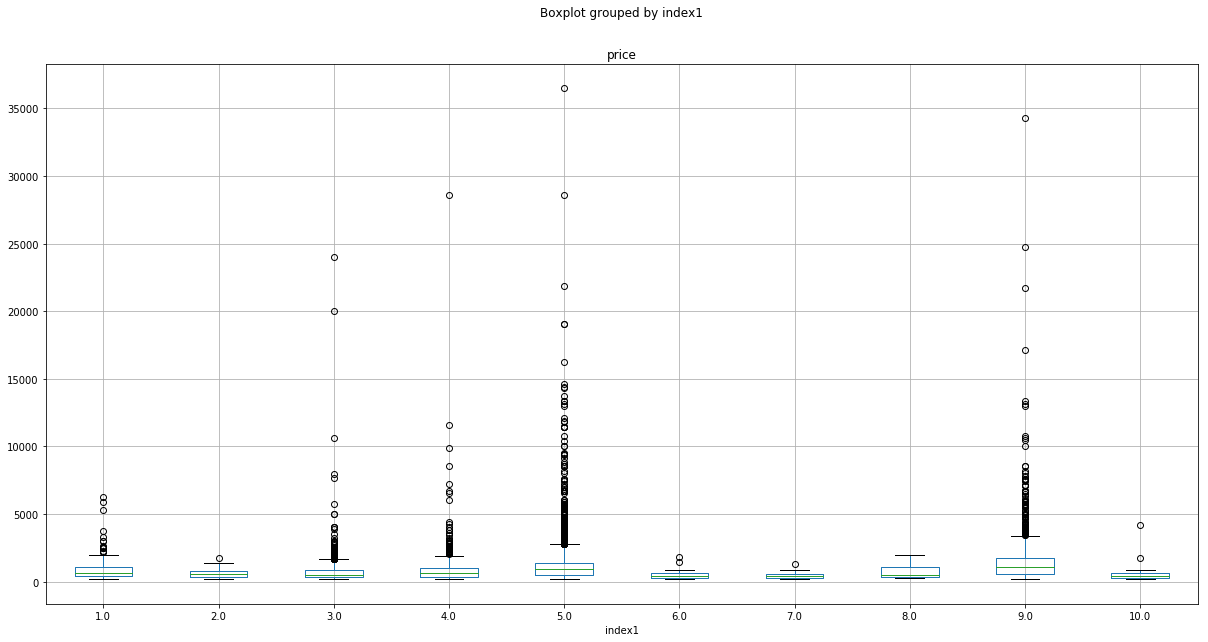

In [204]:
# Create a boxplot to compare means
airbnb_positive1_df.boxplot("price", by="index1", figsize=(20, 10))

In [205]:
# Extract individual groups
group1 = airbnb_positive1_df[airbnb_positive1_df["index1"] == 1]["price"]
group2 = airbnb_positive1_df[airbnb_positive1_df["index1"] == 2]["price"]
group3 = airbnb_positive1_df[airbnb_positive1_df["index1"] == 3]["price"]
group4 = airbnb_positive1_df[airbnb_positive1_df["index1"] == 4]["price"]
group5 = airbnb_positive1_df[airbnb_positive1_df["index1"] == 5]["price"]
group6 = airbnb_positive1_df[airbnb_positive1_df["index1"] == 6]["price"]
group7 = airbnb_positive1_df[airbnb_positive1_df["index1"] == 7]["price"]
group8 = airbnb_positive1_df[airbnb_positive1_df["index1"] == 8]["price"]
group9 = airbnb_positive1_df[airbnb_positive1_df["index1"] == 9]["price"]
group10 = airbnb_positive1_df[airbnb_positive1_df["index1"] == 10]["price"]

In [206]:
# Perform the ANOVA
stats.f_oneway(group1, group2)

F_onewayResult(statistic=1.9361317311939898, pvalue=0.16515928290108603)

# p-value option 2

In [207]:
# using the clean dataframe >0 and <...
airbnb_positive12_df = airbnb_positive_df.loc[airbnb_positive_df["price"]<1000,["id","neighbourhood_cleansed",
                                        "neighbourhood","zipcode","latitude","longitude","price"]]
airbnb_positive12_df.head()

,id,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,price
3,61792,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,953
15,325812,Cuauhtemoc,Centro Historico,6000,19.43453,-99.14675,648
16,326296,Coyoacan,Florida/Axotla,4318,19.34004,-99.18273,380
17,326475,Cuauhtemoc,Roma Norte,6700,19.41297,-99.15735,648
20,386265,Coyoacan,Coyoacan,4040,19.34303,-99.15425,248


In [208]:
airbnb_positive12_df.loc[airbnb_positive12_df['neighbourhood_cleansed'] == 'Alvaro Obregon', 'index1'] = 1
airbnb_positive12_df.loc[airbnb_positive12_df['neighbourhood_cleansed'] == 'Azcapotzalco', 'index1'] = 2
airbnb_positive12_df.loc[airbnb_positive12_df['neighbourhood_cleansed'] == 'Benito Juarez', 'index1'] = 3
airbnb_positive12_df.loc[airbnb_positive12_df['neighbourhood_cleansed'] == 'Coyoacan', 'index1'] = 4
airbnb_positive12_df.loc[airbnb_positive12_df['neighbourhood_cleansed'] == 'Cuauhtemoc', 'index1'] = 5
airbnb_positive12_df.loc[airbnb_positive12_df['neighbourhood_cleansed'] == 'Gustavo A. Madero', 'index1'] = 6
airbnb_positive12_df.loc[airbnb_positive12_df['neighbourhood_cleansed'] == 'Iztacalco', 'index1'] = 7
airbnb_positive12_df.loc[airbnb_positive12_df['neighbourhood_cleansed'] == 'Iztapalapa', 'index1'] = 8
airbnb_positive12_df.loc[airbnb_positive12_df['neighbourhood_cleansed'] == 'Miguel Hidalgo', 'index1'] = 9
airbnb_positive12_df.loc[airbnb_positive12_df['neighbourhood_cleansed'] == 'Venustiano Carranza', 'index1'] = 10
airbnb_positive12_df.head()

,id,neighbourhood_cleansed,neighbourhood,zipcode,latitude,longitude,price,index1
3,61792,Cuauhtemoc,Condesa,6140,19.41259,-99.17959,953,5.0
15,325812,Cuauhtemoc,Centro Historico,6000,19.43453,-99.14675,648,5.0
16,326296,Coyoacan,Florida/Axotla,4318,19.34004,-99.18273,380,4.0
17,326475,Cuauhtemoc,Roma Norte,6700,19.41297,-99.15735,648,5.0
20,386265,Coyoacan,Coyoacan,4040,19.34303,-99.15425,248,4.0


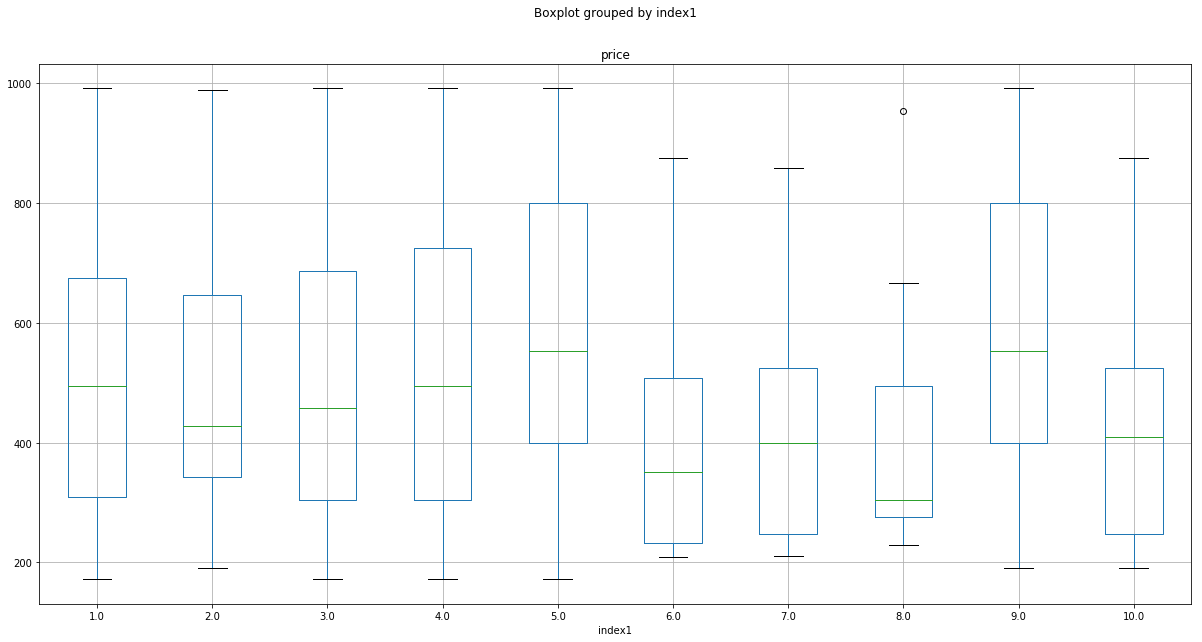

In [209]:
# Create a boxplot to compare means
airbnb_positive12_df.boxplot("price", by="index1", figsize=(20, 10))

In [210]:
group1 = airbnb_positive12_df[airbnb_positive12_df["index1"] == 1]["price"]
group2 = airbnb_positive12_df[airbnb_positive12_df["index1"] == 2]["price"]
group3 = airbnb_positive12_df[airbnb_positive12_df["index1"] == 3]["price"]
group4 = airbnb_positive12_df[airbnb_positive12_df["index1"] == 4]["price"]
group5 = airbnb_positive12_df[airbnb_positive12_df["index1"] == 5]["price"]
group6 = airbnb_positive12_df[airbnb_positive12_df["index1"] == 6]["price"]
group7 = airbnb_positive12_df[airbnb_positive12_df["index1"] == 7]["price"]
group8 = airbnb_positive12_df[airbnb_positive12_df["index1"] == 8]["price"]
group9 = airbnb_positive12_df[airbnb_positive12_df["index1"] == 9]["price"]
group10 = airbnb_positive12_df[airbnb_positive12_df["index1"] == 10]["price"]

In [211]:
# Perform the ANOVA
stats.f_oneway(group1, group2)

F_onewayResult(statistic=0.07260978007150497, pvalue=0.7878387463980046)